In [20]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import random as rand

In [21]:
# Want to solve SDE of the form dX = a(X,t) dt + b(X,t) dB_t
# In this example we will solve a SDE which follows a Geometric Brownian Motion
# This has important applications in finance - particularly in the modelling stock prices
mu = 1
sig = 0.2
def a(x,t):
    return mu*x
def b(x,t):
    return sig*x

In [22]:
# Implement a Box-Muller Transform
def normal(m,s2):
    u1 = rand.random()
    u2 = rand.random()
    
    z0 = np.sqrt(-2*np.log(u1))*np.cos(2*np.pi*u2)
    z1 = np.sqrt(-2*np.log(u1))*np.sin(2*np.pi*u2)

    return z0*np.sqrt(s2) + m

In [23]:
# We use the explicit order 1.0 strong scheme for solution of the SDE
def step_forward(x_start,t_start,delta_t):
    a1 = x_start + a(x_start,t_start)*delta_t + b(x_start,t_start)*normal(0,delta_t)
    a2 = b(t_start,x_start + a(x_start,t_start)*delta_t + b(x_start,t_start)*np.sqrt(delta_t)) - b(x_start,t_start)
    a3 = normal(0,delta_t)**2 - delta_t
    return a1 + (1/(np.sqrt(delta_t))) * a2 * a3

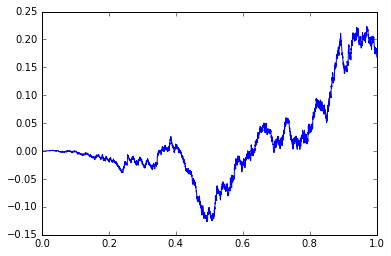

In [24]:
rand.seed(0)
t_max = 1.0
N = 10000
delta_t = t_max/N
T = np.linspace(0,t_max,N)
xv = np.zeros(len(T))
for i in range(N-1):
    xv[i+1] = step_forward(xv[i],T[i],delta_t)
plt.plot(T,xv)
plt.show()